##Import libraries

In [21]:
import pandas as pd
import numpy as np
macdonalds=pd.read_csv("mcdonalds.csv")
print(macdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


##shape of dataset

In [22]:
macdonalds.shape

(1453, 15)

##print three rows

In [23]:
print(macdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


##column names and mean 

In [24]:
MD_x =macdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)
column_names = macdonalds.columns[0:11]
for name, mean in zip(column_names, col_means):
    print(name, mean)

yummy 0.55
convenient 0.91
spicy 0.09
fattening 0.87
greasy 0.53
fast 0.9
cheap 0.6
tasty 0.64
expensive 0.36
healthy 0.2
disgusting 0.24


##catplot between like and age

<ipython-input-54-f93fc82ced33>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=macdonalds,


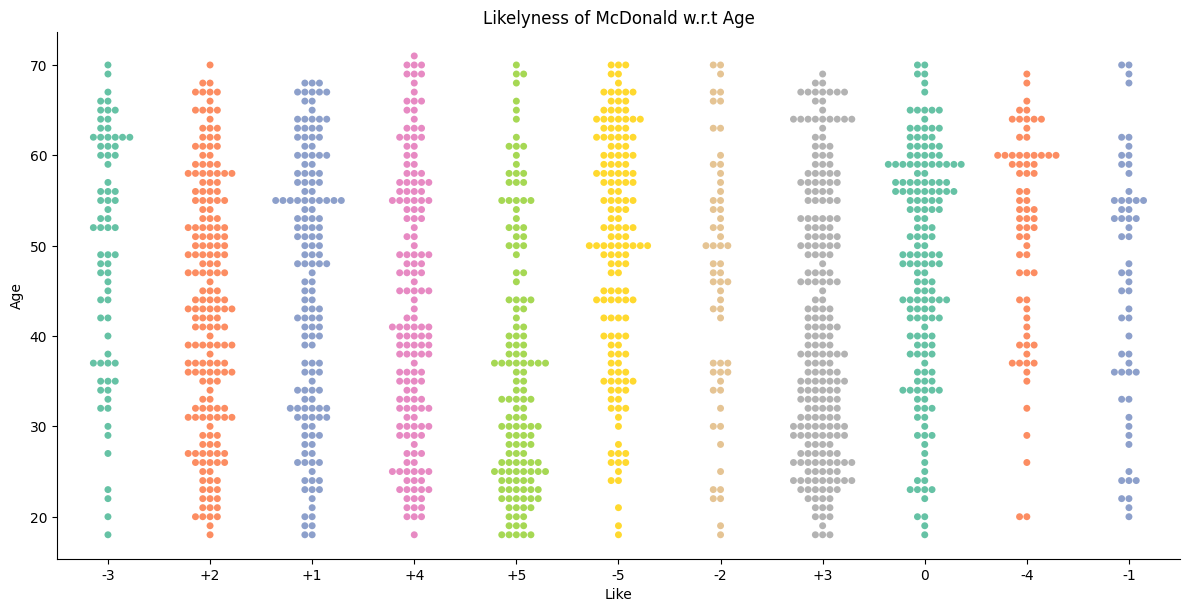

In [54]:
macdonalds['Like']= macdonalds['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=macdonalds, 
            orient="v", height=6, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

##PCA implementation

In [25]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
# Get the summary information
summary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
}, index=['PC'+str(i+1) for i in range(MD_x.shape[1])])
# Print the summary
print("Summary of PCA:")
print(summary_df)

Summary of PCA:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


##scree plot of PCA components

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


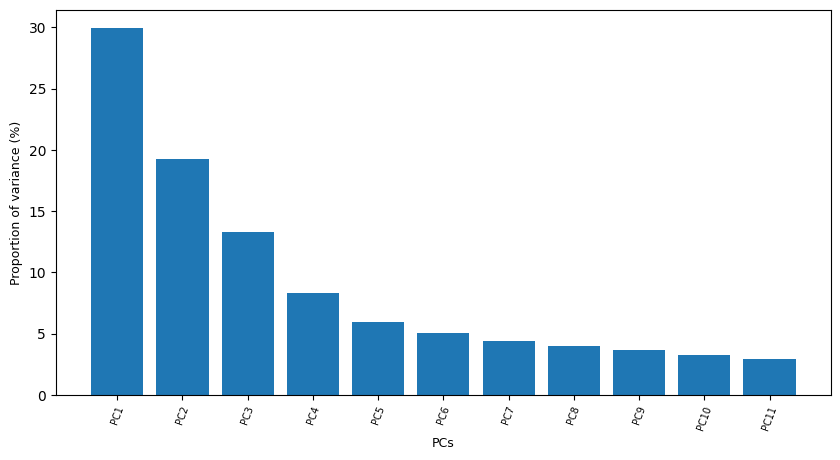

In [43]:
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

##PCA projection

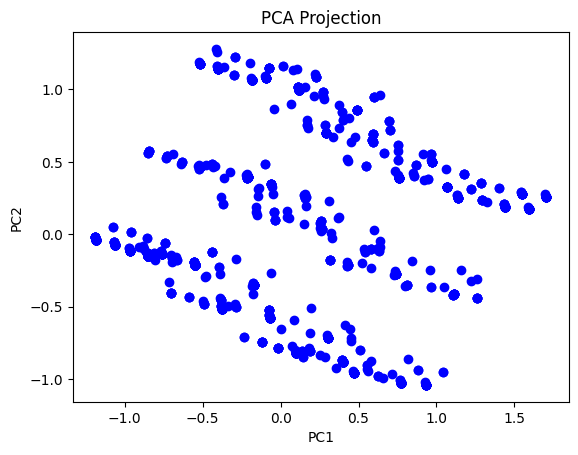

In [26]:
import matplotlib.pyplot as plt
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

##Biplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


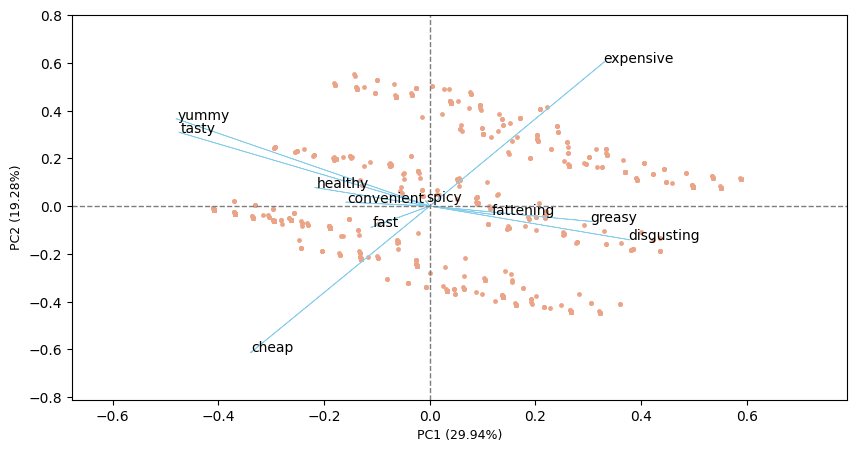

In [27]:
!pip install bioinfokit
from bioinfokit.visuz import cluster
# get PC scores
pca_scores =MD_pca
loadings = pca.components_
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=macdonalds.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

##elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

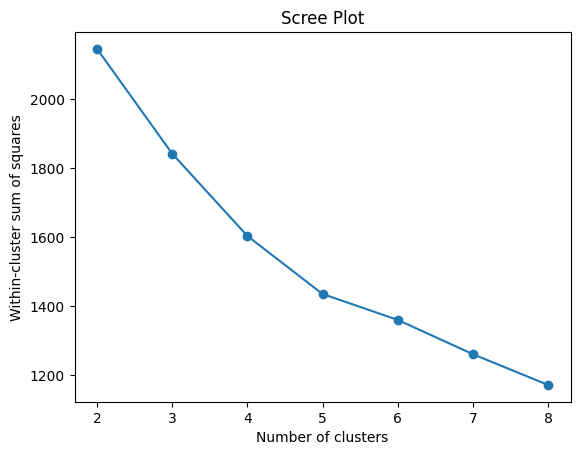

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have the MD_x matrix from the previous code

# Set the range of cluster numbers to consider
k_values = range(2, 9)

# Initialize an empty list to store the WCSS values
wcss = []

# Perform K-means clustering for each cluster number and calculate the WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(MD_x)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    wcss.append(np.sum((MD_x - cluster_centers[cluster_labels])**2))

# Plot the scree plot
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Scree Plot')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


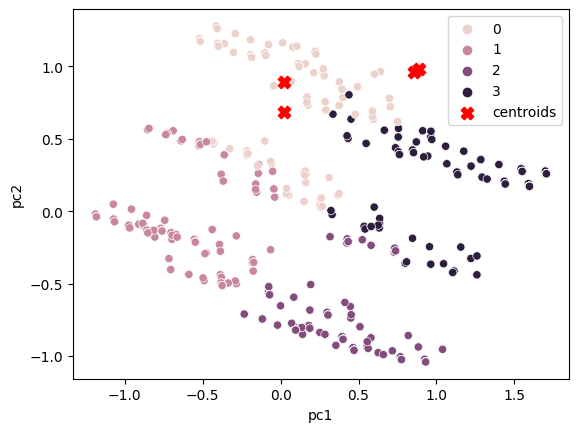

In [57]:
#Visulazing clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD_x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data =MD_pca, columns = names)
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

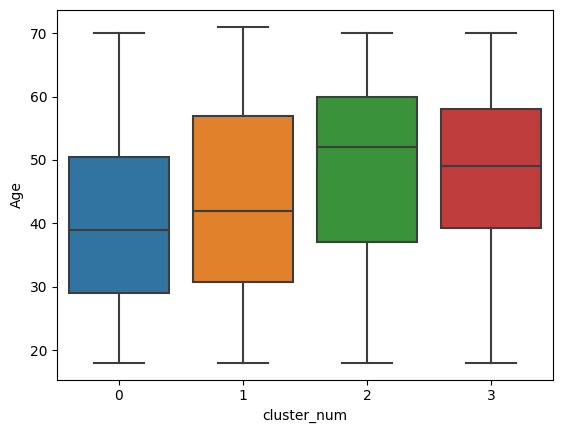

In [58]:
macdonalds['cluster_num'] = kmeans.labels_
sns.boxplot(x="cluster_num", y="Age", data=macdonalds)